In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('/Users/wastechs/Documents/git-repos/energy-efficiency')
from lib.util.helper import query_table, weekday_time_series
import seaborn as sns
import plotly.express as px
from statsmodels.graphics.tsaplots import plot_acf

In [13]:
#df_1T = query_table(table='entsorgung_30T')
ent_week = weekday_time_series(sensor_id='entsorgung_5T')

ent_week['kw'] = round(ent_week['kw'], 2)
ent_week['kw'] = ent_week['kw'].apply(lambda x: 0.0 if x == -0.0 else x)
ent_week['log_kw'] = np.log(ent_week['kw'])

In [14]:
px.line(
    x=ent_week.index, y=ent_week.kw, 
    title='Entsorgung',
    labels={
        'x': 'Time',
        'y': 'kW'
    })

In [15]:
ent_week.shape

(1440, 9)

In [16]:
time_int_range = np.arange(0, 1440*5, 5)
ent_week['t'] = time_int_range
ent_week['t_scaled'] = (ent_week['t'] - ent_week['t'].min()) / (ent_week['t'].max() - ent_week['t'].min())

In [17]:
px.line(
    x=ent_week['t_scaled'], y=ent_week.kw, 
    title='Entsorgung',
    labels={
        'x': 'Time',
        'y': 'kW'
    })

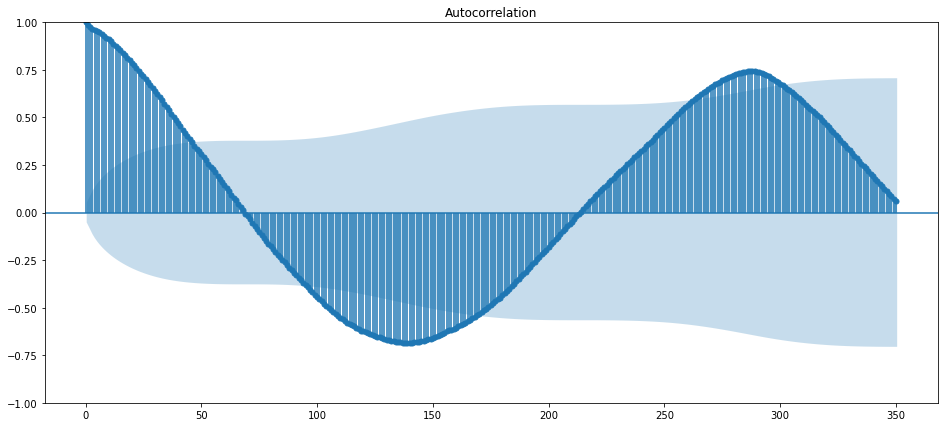

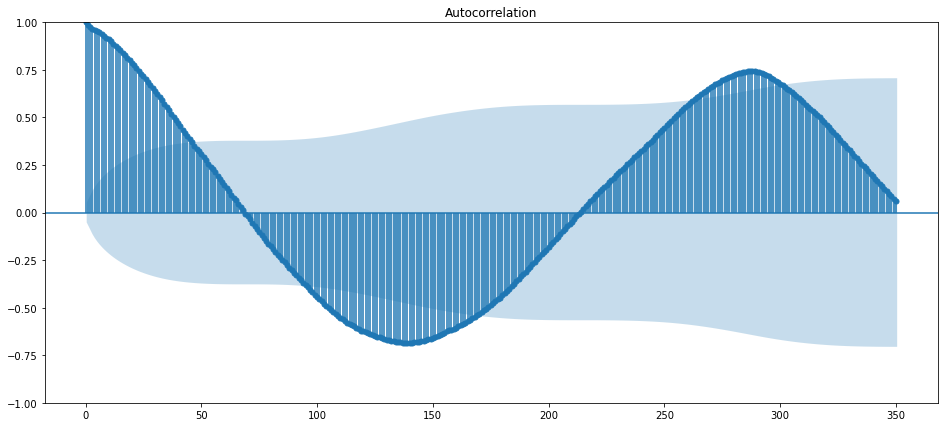

In [23]:
fig, ax = plt.subplots(figsize=(16, 7))
plot_acf(ent_week.kw.values.squeeze(), lags=350, ax=ax)

In [22]:
# Short term interval
ent_week['t_scaled'].iloc[125], ent_week['t_scaled'].iloc[150]

(0.08686587908269632, 0.10423905489923559)

In [24]:
# Long term interval
ent_week['t_scaled'].iloc[260], ent_week['t_scaled'].iloc[300]

(0.18068102849200834, 0.20847810979847117)